In [1]:
import textdistance
import string
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score

In [2]:
def process_text(s):
    # lower case
    s_out = s.lower()
    # remove punctuation
    punctuation_remover = str.maketrans('', '', string.punctuation)
    s_out = s_out.translate(punctuation_remover)
    return s_out

In [3]:
data=pd.read_csv(r"english.csv")

In [4]:
data.describe()

,Confidence
count,4813.000000
mean,0.867328
std,0.099389
min,0.247828
25%,0.834124
50%,0.927315
75%,0.929955
max,0.929955


In [5]:
data.fillna(value="", inplace=True)
data.head()

,Student,Proficiency,Ground Truth,IsCorrect,Transcript,Confidence
0,1378_HI_S1_S_0,S,Where is your house?,True,where is your home,0.929955
1,1384_HI_S1_S_0,S,Where is your house?,True,where is your house,0.929955
2,1389_HI_S1_S_0,S,Where is your house?,True,where is your house,0.929955
3,1399_HI_S1_S_0,S,Where is your house?,True,where is your house,0.929955
4,1402_HI_S1_S_0,S,Where is your house?,True,where is your house,0.929955


In [6]:
data.describe()

,Student,Proficiency,Ground Truth,IsCorrect,Transcript,Confidence
count,5319,5319,5319,5319,5319,5319.000000
unique,5319,1,22,2,1355,2510.000000
top,1056_MR_S1_S_2,S,Where is your house?,True,,0.929955
freq,1,5319,760,4038,506,2191.000000


In [7]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

vectorizer = TfidfVectorizer()
df=pd.DataFrame()
for index, row in data.iterrows():     
    corpus = [row['Ground Truth']]
    z=0
    X = vectorizer.fit_transform(corpus)
    query = [process_text(row['Transcript'])]
    Y = vectorizer.transform(query)
    z=cosine_similarity(Y, X.toarray())
    #z = textdistance.jaro_winkler(corpus, query)
 #   transcript=query
    temp = pd.DataFrame([row])
    temp['Distance']=z
    df=df.append(temp)
print(df.describe())
    


          Distance
count  5319.000000
mean      0.777297
std       0.351534
min       0.000000
25%       0.707107
50%       1.000000
75%       1.000000
max       1.000000


In [8]:
df.head()

,Student,Proficiency,Ground Truth,IsCorrect,Transcript,Confidence,Distance
0,1378_HI_S1_S_0,S,Where is your house?,True,where is your home,0.929955,0.866025
1,1384_HI_S1_S_0,S,Where is your house?,True,where is your house,0.929955,1.000000
2,1389_HI_S1_S_0,S,Where is your house?,True,where is your house,0.929955,1.000000
3,1399_HI_S1_S_0,S,Where is your house?,True,where is your house,0.929955,1.000000
4,1402_HI_S1_S_0,S,Where is your house?,True,where is your house,0.929955,1.000000


In [9]:
output=df
output = df.replace(True,1)
output = df.replace(False,0)
output.head()

,Student,Proficiency,Ground Truth,IsCorrect,Transcript,Confidence,Distance
0,1378_HI_S1_S_0,S,Where is your house?,1.0,where is your home,0.929955,0.866025
1,1384_HI_S1_S_0,S,Where is your house?,1.0,where is your house,0.929955,1.000000
2,1389_HI_S1_S_0,S,Where is your house?,1.0,where is your house,0.929955,1.000000
3,1399_HI_S1_S_0,S,Where is your house?,1.0,where is your house,0.929955,1.000000
4,1402_HI_S1_S_0,S,Where is your house?,1.0,where is your house,0.929955,1.000000


In [10]:
output_file = r'english_distance.csv'
output.to_csv(output_file, index=False)

In [11]:
output['Ground Truth'].value_counts()

Where is your house?      760
What is the time?         658
I like to read.           447
This is a small bag.      424
I have a fat  dog .       341
I like to play.           327
This is a red ball.       297
I like to sing.           273
I like to sleep.          268
I have a small house.     261
This is a big bus.        256
This is a blue shirt.     250
I have a big house.       223
I have a fat cat.         220
This is a large house.     61
She has many books.        53
This is a long road.       46
This is a tall tree.       38
She has a green kite.      36
She has a red dress.       29
This is a small door.      29
He has a blue shirt.       22
Name: Ground Truth, dtype: int64

In [12]:
print(output[output['IsCorrect']==0].describe())
print(output[output['IsCorrect']==1].describe())

       IsCorrect     Distance
count     1281.0  1281.000000
mean         0.0     0.443154
std          0.0     0.416643
min          0.0     0.000000
25%          0.0     0.000000
50%          0.0     0.577350
75%          0.0     0.816497
max          0.0     1.000000
       IsCorrect     Distance
count     4038.0  4038.000000
mean         1.0     0.883299
std          0.0     0.247145
min          1.0     0.000000
25%          1.0     0.866025
50%          1.0     1.000000
75%          1.0     1.000000
max          1.0     1.000000


In [13]:
backup=output[['IsCorrect', 'Ground Truth','Confidence','Distance']].copy()

correct=output[output['IsCorrect']==1][0:1281]
incorrect=output[output['IsCorrect']==0]
output=correct.append(incorrect)
output.describe()

,IsCorrect,Distance
count,2562.000000,2562.000000
mean,0.500000,0.649299
std,0.500098,0.410117
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.500000,0.816497
75%,1.000000,1.000000
max,1.000000,1.000000


In [14]:
output['Ground Truth'].value_counts()

Where is your house?      503
This is a small bag.      424
I like to read.           402
I have a fat  dog .       341
What is the time?         269
This is a red ball.        83
I have a small house.      70
This is a blue shirt.      63
I like to sleep.           61
I like to play.            57
This is a big bus.         57
I like to sing.            56
I have a fat cat.          45
I have a big house.        39
This is a large house.     29
She has many books.        15
This is a long road.       10
He has a blue shirt.        9
She has a green kite.       8
This is a small door.       8
This is a tall tree.        7
She has a red dress.        6
Name: Ground Truth, dtype: int64

In [15]:
# Simple model
output
df_model = output[['IsCorrect', 'Ground Truth','Confidence','Distance']].copy()
df_model = pd.get_dummies(df_model)
random_seed = 2
X = df_model[[x for x in df_model.columns if x!='IsCorrect']]
y = df_model['IsCorrect']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=random_seed)
rf.fit(X_train, y_train)
#y_pred=rf.predict(X_test)
y_pred_prob = [y[1] for y in rf.predict_proba(X_test)]
print('Random Forest Model Trained on {0} samples; Tested on {1} samples'.format(len(y_train), len(y_test)))

Random Forest Model Trained on 2049 samples; Tested on 513 samples


In [16]:
# Results over different thresholds
thresholds = np.arange(0.3, 0.8, 0.15)
threshold_performance = {}
for t in thresholds:
    y_pred_binary = [int(p>t) for p in y_pred_prob]
    #print(y_pred_binary,"-----")
    summary_data = {}
    summary_data['F1'] = f1_score(y_test, y_pred_binary)
    summary_data['Precision'] = precision_score(y_test, y_pred_binary)
    summary_data['Recall'] = recall_score(y_test, y_pred_binary)
    summary_data['Accuracy'] = accuracy_score(y_test, y_pred_binary)
    summary_data['AUC'] = roc_auc_score(y_test, y_pred_prob)
    summary_data['pred_binary'] = Counter(y_pred_binary)
    threshold_performance[round(t, 2)] = summary_data

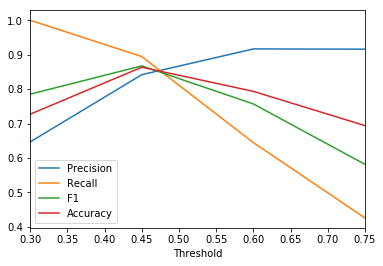

In [17]:
# Plot
threshold_performance_data = []
for k, v in threshold_performance.items():
    threshold_performance_data.append([k, v['Precision'], v['Recall'], v['F1'], v['Accuracy'], v['pred_binary']])
threshold_df = pd.DataFrame(threshold_performance_data, columns=['Threshold', 'Precision', 'Recall', 'F1', 'Accuracy', 'pred_binary'])
threshold_df.set_index('Threshold', inplace=True)
threshold_df.plot()
plt.show()

In [18]:
# Best threshold
threshold_df.sort_values('Accuracy', ascending=False).head(1)

,Precision,Recall,F1,Accuracy,pred_binary
Threshold,,,,,
0.45,0.841912,0.894531,0.867424,0.863548,"{0: 241, 1: 272}"


In [19]:
# Data: 1 vs 0
Counter(y)[1]/len(y)

0.5